In [0]:
pip install nltk

Python interpreter will be restarted.
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Using cached click-8.0.3-py3-none-any.whl (97 kB)
  Using cached regex-2022.1.18-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (764 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-8cebd154-20a9-42fc-ba77-47fc61421d7b/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install wordcloud

Python interpreter will be restarted.
  Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-8cebd154-20a9-42fc-ba77-47fc61421d7b/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install spacy

Python interpreter will be restarted.
  Using cached spacy-3.2.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.2 MB)
  Using cached murmurhash-1.0.6-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (21 kB)
  Using cached typer-0.4.0-py3-none-any.whl (27 kB)
  Using cached cymem-2.0.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36 kB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached srsly-2.4.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (454 kB)
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
  Using cached spacy_legacy-3.0.8-py2.py3-none-any.whl (14 kB)
  Using cached pydantic-1.8.2-cp38-cp38-manylinux2014_x86_64.whl (13.7 MB)
  Using cached thinc-8.0.13-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (636 kB)
  Using cached spacy_loggers-1.0.1-py3-none-any.whl (7.0 kB)
  Using cached preshed-3.0.6-cp38-cp38

In [0]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0.tar.gz --no-deps

Python interpreter will be restarted.
  Created wheel for en-core-web-sm: filename=en_core_web_sm-3.2.0-py3-none-any.whl size=13900194 sha256=97b4bfd6a17de57877591a5737e6c8e08c211603868c7575a62c9f058f362a58
  Stored in directory: /root/.cache/pip/wheels/dd/42/a5/bc03d010e897348c09e48307bbce5d5662d6dd5ab68762b2eb
Successfully built en-core-web-sm
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-8cebd154-20a9-42fc-ba77-47fc61421d7b/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install pyLDAvis


Python interpreter will be restarted.
  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached numexpr-2.8.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (381 kB)
  Using cached gensim-4.1.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)
  Using cached funcy-1.17-py2.py3-none-any.whl (33 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached numpy-1.22.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached future-0.18.2-py3-none-any.whl
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Not uninstalling numpy at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-8cebd154-20a9-42fc-ba77-47fc61421d7b
    Can't uninstall 'numpy'. No files were found to uninstall.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-8cebd154-20a9-42fc-ba77-47fc61421d7b/bin/python -m pip install --upgrade pip'

In [0]:
import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## <a id='4'><h2 style="background-color:Lavender;border-radius:5px;text-align:center;padding:7px;color:MediumPurple;font-family:Garamond;">Topic Modelling<h2></a>

In [0]:
DF = (spark.read
      .option("inferSchema", True)
      .json("/FileStore/tables/Project_Data_Extract/Reviews_Final.json"))
#spark.conf.set("spark.sql.execution.arrow.enabled", "false") 
reviews_pdf=DF.toPandas()
reviews_pdf.head()

,Aspect,Aspect Keywords,Aspect Sentiment,Emotion,Food_Entities,Overall Aspect,business_id,cool,date,dominant_topic,dominant_topic_theme,funny,month,personality,sentiment,sentiment_score,stars,text_syntatics_cleaned,useful
0,"[FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALIT...","[grubhub order sent chopstick soy sauce, would...","[neutral, neutral, neutral, negative, negative...",anger,[chopstick soy sauce],RESTAURANT#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,3/7/2019,3,Food Ordering/Food(chicken/sauce)/Service/Temp...,1,3,ISTJ,negative,-0.7506,1,ordered grubhubstaying hotel indicated order s...,0
1,"[RESTAURANT#GENERAL, RESTAURANT#GENERAL, AMBIE...","[pleasant surprise, burn time, planned great a...","[positive, neutral, positive, positive, positive]",joy,[],SERVICE#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,2/15/2019,17,Customer Service/Food/Drinks/Environment(clean...,0,2,ISTP,positive,0.9694,5,pleasant surprise whatever stopped ra burn tim...,0
2,"[SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURA...","[always super, clean come time, always good, e...","[positive, positive, positive, neutral, neutra...",joy,[food yummy hater],FOOD#QUALITY,dZh2u96vAN8pdHmiwcpXdw,0,3/22/2019,17,Customer Service/Food/Drinks/Environment(clean...,0,3,INTJ,positive,0.9842,5,love place atmosphere nice always super clean ...,0
3,"[RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY]","[avocadofresh rice, loose small, portion roll ...","[positive, negative, neutral]",fear,[miso soup flavor tofu],FOOD#QUALITY,dZh2u96vAN8pdHmiwcpXdw,0,2/23/2019,16,Food(Roll/sushi/spicy/fried rice/shrimp/chicken),0,2,ISTP,neutral,0.0000,1,fish avocadofresh riceloose small portion roll...,1
4,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...","[experience meal, card split bill couple minut...","[neutral, neutral, negative, neutral, neutral,...",joy,[],SERVICE#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,3/17/2019,15,Payment(Comped),0,3,ISTJ,positive,0.6249,2,girlfriend came two week ago quite experience ...,3


In [0]:
reviews_pdf['Aspect Keywords'] = reviews_pdf['Aspect Keywords'].str.replace(" wa ", '')
reviews_pdf['text_syntatics_cleaned'] = reviews_pdf['text_syntatics_cleaned'].str.replace(" wa ", '')

In [0]:
reviews_pdf['Aspect Keywords'].iloc[:10][1]

Out[4]: '[pleasant surprise, burn time, planned great atmosphere,awesome bartender, super hard worker]'

In [0]:
reviews_pdf_A=reviews_pdf[reviews_pdf['business_id'].isin(['s7baMoiG1821_3NblCfK6w'])]

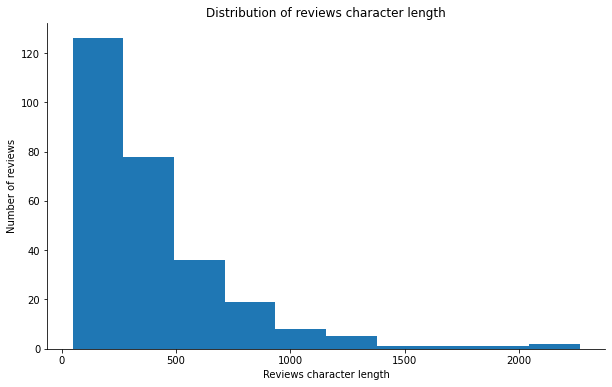

In [0]:
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in reviews_pdf_A.text_syntatics_cleaned]
plt.hist(doc_lens, bins = 10)
plt.title('Distribution of reviews character length')
plt.ylabel('Number of reviews')
plt.xlabel('Reviews character length')
sns.despine();

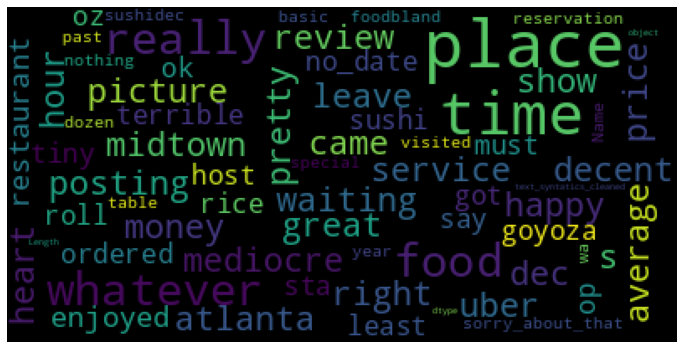

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(reviews_pdf_A['text_syntatics_cleaned']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [0]:
import pandas as pd
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews_pdf_A['text_syntatics_cleaned'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
df2

,unigram,count
0,sushi,229
1,food,191
2,service,158
3,roll,151
4,time,146
5,minute,140
6,table,126
7,place,125
8,hour,115
9,came,114


In [0]:
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the text"))
fig.show()


In [0]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(reviews_pdf_A['text_syntatics_cleaned'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3

,bigram,count
0,happy hour,52
1,ra sushi,44
2,fried rice,23
3,sushi bar,21
4,customer service,20
5,sushi roll,18
6,personal_message_ _private_message,17
7,took minute,15
8,waited minute,15
9,miso soup,14


In [0]:
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in text"))
fig.show()

In [0]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(reviews_pdf_A['text_syntatics_cleaned'], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df4

,trigram,count
0,happy hour menu,10
1,viva la vega,9
2,chicken fried rice,9
3,happy hour special,8
4,waited hour food,6
5,la vega roll,5
6,asked speak manager,5
7,ra sushi bar,4
8,salmon fried rice,4
9,shrimp tempura roll,4


In [0]:
fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in text"))
fig.show()

In [0]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(reviews_pdf['text_syntatics_cleaned'])

lda_model = LatentDirichletAllocation(n_components=20, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [0]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/databricks/python/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



In [0]:
import numpy as np
# Show top 20 keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,care,change,save,service,complete,male,katie,run,manager,quality,lack,bad,yelp,review,frustrated,waiter,quite,level,new,money
Topic 1,really,rooftop,beat,surprised,add,enjoy,cocktail,big,honestly,fish,dining,view,grab,restaurant,aside,laughing,fruit,kind,meal,soon
Topic 2,payment,returning,ticket,split,foodgood,make,party,tofu,small,portion,fish,flavor,soup,miso,roll,salmon,timely,sushi,server,avocado
Topic 3,message,order,personal,private,ordered,time,food,sauce,roll,restaurant,pick,got,chicken,took,container,went,cold,think,service,menu
Topic 4,table,hostess,touch,stay,minute,say,menu,experience,sushi,wait,away,said,let,place,make,host,asked,people,area,server
Topic 5,sushi,roll,food,eat,service,place,lot,turf,surf,taco,poor,presentation,gluten,point,far,rackin,drink,downtown,good,old
Topic 6,multiple,interior,refill,bar,lighting,absolutely,today,experience,visited,remember,red,black,love,time,great,smoked,sushi,service,gave,gorgeous
Topic 7,customer,manager,long,ended,said,terrible,pay,service,restaurant,half,waiting,general,refund,pretty,food,duty,staffed,lady,better,come
Topic 8,owner,worker,feel,reserved,explanation,expecting,away,crowd,watched,turn,star,rating,end,table,said,bad,group,asked,home,young
Topic 9,sushi,definitely,restaurant,location,parking,sauce,time,best,spot,tasty,roll,table,including,helpful,tito,validate,star,making,came,end


In [0]:
Topics_theme = ['Topic_1__BadService_CustomerEmotionsFrustrated_Payment',
                'Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view',
                'Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server',
                'Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold',
                'Topic_5__Food_sushi__Service',
                'Topic_6__Place__Food_TurfnSurf_Taco_Gluten', 
                'Topic_7__Environment_Interior_barLighting_RedBlackTheme__Food_sushi_smoked__Service',
                'Topic_8__CustomerService_WaitingTime_PaymentRefund',
                'Topic_9__GroupWaiting_Crowd__Time__Rating',
                'Topic_10__LocationParking__Food_sushi',
                'Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan',
                'Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__Amazing place__Pleasure',
                'Topic_13__Ambience__Food__Environment_Patio',
                'Topic_14__Overpriced__Ambience__Music',
                'Topic_15__DynamiteFood__Service__ScallopFood__MediocreFood',
                'Topic_16__Payment_Comped',
                'Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken',
                'Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin',
                'Topic_19__Service_WaitingTime',
                'Topic_20__Environment_Decor_patio_lighting__Music'


]
df_topic_keywords['topic_theme'] = Topics_theme


In [0]:
df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T

topic_theme,Topic_1__BadService_CustomerEmotionsFrustrated_Payment,Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view,Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server,Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold,Topic_5__Food_sushi__Service,Topic_6__Place__Food_TurfnSurf_Taco_Gluten,Topic_7__Environment_Interior_barLighting_RedBlackTheme__Food_sushi_smoked__Service,Topic_8__CustomerService_WaitingTime_PaymentRefund,Topic_9__GroupWaiting_Crowd__Time__Rating,Topic_10__LocationParking__Food_sushi,Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan,Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__Amazing place__Pleasure,Topic_13__Ambience__Food__Environment_Patio,Topic_14__Overpriced__Ambience__Music,Topic_15__DynamiteFood__Service__ScallopFood__MediocreFood,Topic_16__Payment_Comped,Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken,Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin,Topic_19__Service_WaitingTime,Topic_20__Environment_Decor_patio_lighting__Music
Word 0,care,really,payment,message,table,sushi,multiple,customer,owner,sushi,bite,excellent,fantastic,shut,roll,card,roll,great,food,asian
Word 1,change,rooftop,returning,order,hostess,roll,interior,manager,worker,definitely,foodmediocre,serviceexcellent,husband,likely,place,gave,sushi,sushi,service,man
Word 2,save,beat,ticket,personal,touch,food,refill,long,feel,restaurant,dragon,taco,stair,wanting,witnessed,multiple,ordered,place,minute,white
Word 3,service,surprised,split,private,stay,eat,bar,ended,reserved,location,best,poke,time,lack,lack,cheap,good,good,time,decor
Word 4,complete,add,foodgood,ordered,minute,service,lighting,said,explanation,parking,slow,visit,patio,tell,best,week,spicy,food,order,patio
Word 5,male,enjoy,make,time,say,place,absolutely,terrible,expecting,sauce,serviceextremely,floor,free,accommodate,dynamite,keeping,place,happy,table,look
Word 6,katie,cocktail,party,food,menu,lot,today,pay,away,time,roll,chunk,use,overpriced,service,later,fried,love,came,entire
Word 7,run,big,tofu,sauce,experience,turf,experience,service,crowd,best,great,salmon,issue,heart,recommend,waiter,rice,time,sushi,express
Word 8,manager,honestly,small,roll,sushi,surf,visited,restaurant,watched,spot,service,elevator,checked,got,time,space,shrimp,service,drink,decorated
Word 9,quality,fish,portion,restaurant,wait,taco,remember,half,turn,tasty,sushi,smokey,selection,picture,happy,equally,salmon,hour,server,music


In [0]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns
# topicnames = ["Topic" + str(i) for i in range(20)]

# index names
docnames = ["Doc" + str(i) for i in range(len(reviews_pdf))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic

topic_theme,Topic_1__BadService_CustomerEmotionsFrustrated_Payment,Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view,Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server,Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold,Topic_5__Food_sushi__Service,Topic_6__Place__Food_TurfnSurf_Taco_Gluten,Topic_7__Environment_Interior_barLighting_RedBlackTheme__Food_sushi_smoked__Service,Topic_8__CustomerService_WaitingTime_PaymentRefund,Topic_9__GroupWaiting_Crowd__Time__Rating,Topic_10__LocationParking__Food_sushi,...,Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__Amazing place__Pleasure,Topic_13__Ambience__Food__Environment_Patio,Topic_14__Overpriced__Ambience__Music,Topic_15__DynamiteFood__Service__ScallopFood__MediocreFood,Topic_16__Payment_Comped,Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken,Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin,Topic_19__Service_WaitingTime,Topic_20__Environment_Decor_patio_lighting__Music,dominant_topic
Doc0,0.00,0.00,0.00,0.95,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
Doc1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.93,0.00,0.00,17
Doc2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.00,17
Doc3,0.01,0.01,0.40,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.51,0.01,0.01,0.01,16
Doc4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.78,0.00,0.00,0.21,0.00,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc436,0.00,0.00,0.00,0.68,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,3
Doc437,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.39,0.00,17
Doc438,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.96,0.00,18
Doc439,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.64,0.31,0.00,0.00,16


In [0]:
df_document_topic.colu

In [0]:
reviews_pdf.reset_index(inplace=True)
df_document_topic.reset_index(inplace=True)

In [0]:
#df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(reviews_pdf, df_document_topic, left_index=True, right_index=True)
#df_sent_topic.drop('index_x', axis=1, inplace=True)

In [0]:
reviews_pdf.shape

Out[22]: (441, 20)

In [0]:
df_document_topic.shape

Out[23]: (441, 22)

In [0]:
df_sent_topic['dominant_topic_x']

Out[29]: 0       3
1      17
2      17
3      16
4      15
       ..
436     3
437    17
438    18
439    16
440    16
Name: dominant_topic_x, Length: 441, dtype: int64

In [0]:
df_sent_topic.rename(columns={'dominant_topic_x':'dominant_topic'},inplace=True)

In [0]:
df_sent_topic.drop(columns=['index_y'],inplace=True)

In [0]:
def label_theme(row):
    if row['dominant_topic'] == 0 :
        return 'Topic_1__Bad Service_Customer Emotions_frustrated_Payment_money'
    if row['dominant_topic'] == 1 :
        return 'Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view'
    if row['dominant_topic'] == 2 :
        return 'Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server'
    if row['dominant_topic'] == 3:
        return 'Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold'
    if row['dominant_topic']  == 4:
        return 'Topic_5__Food_sushi__Service'
    if row['dominant_topic'] == 5:
        return 'Topic_6__Place__Food_TurfnSurf_Taco_Gluten'
    if row['dominant_topic'] == 6:
        return 'Topic_7__Environment_Interior_barLighting_RedBlackTheme__Food_sushi_smoked__Service'
    if row['dominant_topic'] == 7:
        return 'Topic_8__CustomerService_WaitingTime_PaymentRefund'
    if row['dominant_topic'] == 8:
        return 'Topic_9__GroupWaiting_Crowd__Time__Rating'
    if row['dominant_topic'] == 9:
        return 'Topic_10__LocationParking__Food_sushi'
    if row['dominant_topic'] == 10:
        return 'Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan'
    if row['dominant_topic'] == 11:
        return 'Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__Amazing place__Pleasure'
    if row['dominant_topic'] == 12:
        return 'Topic_13__Ambience__Food__Environment_Patio'
    if row['dominant_topic'] == 13:
        return 'Topic_14__Overpriced__Ambience__Music'
    if row['dominant_topic'] == 14:
        return 'Topic_15__DynamiteFood__Service__ScallopFood__MediocreFood'
    if row['dominant_topic'] == 15:
        return 'Topic_16__Payment_Comped'
    if row['dominant_topic'] == 16:
        return 'Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken'
    if row['dominant_topic'] == 17:
        return 'Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin'
    if row['dominant_topic'] == 18:
        return 'Topic_19__Service_WaitingTime'
    if row['dominant_topic'] == 19:
        return 'Topic_20__Environment_Decor_patio_lighting__Music'
df_sent_topic['dominant_topic_theme'] = df_sent_topic.apply (lambda row: label_theme(row), axis=1)
df_sent_topic

,Aspect,Aspect Keywords,Aspect Sentiment,Emotion,Food_Entities,Overall Aspect,business_id,cool,date,dominant_topic,...,Topic_11__MedicocreFood__SlowService__Food_sushi_roll_vegan,Topic_12__ServiceExcellent_GoodFood_Taco_smokey_salmon_Appetizer__Amazing place__Pleasure,Topic_13__Ambience__Food__Environment_Patio,Topic_14__Overpriced__Ambience__Music,Topic_15__DynamiteFood__Service__ScallopFood__MediocreFood,Topic_16__Payment_Comped,Topic_17__Food_Roll_sushi_spicy_fried rice_shrimp_chicken,Topic_18__CustomerService__FoodDrinks__CleanEnvironment__Place_austin,Topic_19__Service_WaitingTime,Topic_20__Environment_Decor_patio_lighting__Music
0,"[FOOD#QUALITY, RESTAURANT#GENERAL, FOOD#QUALIT...","[grubhub order sent chopstick soy sauce, would...","[neutral, neutral, neutral, negative, negative...",anger,[chopstick soy sauce],RESTAURANT#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,3/7/2019,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,"[RESTAURANT#GENERAL, RESTAURANT#GENERAL, AMBIE...","[pleasant surprise, burn time, planned great a...","[positive, neutral, positive, positive, positive]",joy,[],SERVICE#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,2/15/2019,17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.93,0.00,0.00
2,"[SERVICE#GENERAL, RESTAURANT#GENERAL, RESTAURA...","[always super, clean come time, always good, e...","[positive, positive, positive, neutral, neutra...",joy,[food yummy hater],FOOD#QUALITY,dZh2u96vAN8pdHmiwcpXdw,0,3/22/2019,17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.00
3,"[RESTAURANT#GENERAL, FOOD#QUALITY, FOOD#QUALITY]","[avocadofresh rice, loose small, portion roll ...","[positive, negative, neutral]",fear,[miso soup flavor tofu],FOOD#QUALITY,dZh2u96vAN8pdHmiwcpXdw,0,2/23/2019,16,...,0.01,0.01,0.01,0.01,0.01,0.01,0.51,0.01,0.01,0.01
4,"[RESTAURANT#GENERAL, SERVICE#GENERAL, RESTAURA...","[experience meal, card split bill couple minut...","[neutral, neutral, negative, neutral, neutral,...",joy,[],SERVICE#GENERAL,dZh2u96vAN8pdHmiwcpXdw,0,3/17/2019,15,...,0.00,0.00,0.00,0.00,0.00,0.78,0.00,0.00,0.21,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,"[FOOD#QUALITY, FOOD#STYLE_OPTIONS, FOOD#QUALIT...","[roll goyoza oz rice, tiny roll, taste old man...","[neutral, neutral, neutral, neutral, neutral, ...",sadness,[roll goyoza oz rice roll sauce],SERVICE#GENERAL,s7baMoiG1821_3NblCfK6w,0,10/4/2020,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00
437,"[RESTAURANT#GENERAL, RESTAURANT#GENERAL, FOOD#...","[least time, must say, sushi ok host, rude ser...","[neutral, neutral, positive, negative, neutral...",anger,[],SERVICE#GENERAL,s7baMoiG1821_3NblCfK6w,0,11/1/2020,17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.39,0.00
438,"[SERVICE#GENERAL, SERVICE#GENERAL, SERVICE#GEN...","[table reservation, minute service, server nev...","[neutral, neutral, neutral, neutral, neutral, ...",sadness,[],SERVICE#GENERAL,s7baMoiG1821_3NblCfK6w,0,10/25/2020,18,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.96,0.00
439,"[RESTAURANT#GENERAL, FOOD#QUALITY, RESTAURANT#...","[place dozen time, really great, experience gr...","[neutral, positive, positive, neutral, neutral...",joy,[],RESTAURANT#GENERAL,s7baMoiG1821_3NblCfK6w,0,11/9/2020,16,...,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.31,0.00,0.00


In [0]:
df_sent_topic.columns

Out[37]: Index(['Aspect', 'Aspect Keywords', 'Aspect Sentiment', 'Emotion',
       'Food_Entities', 'Overall Aspect', 'business_id', 'cool', 'date',
       'dominant_topic', 'dominant_topic_theme', 'funny', 'month',
       'personality', 'sentiment', 'sentiment_score', 'stars',
       'text_syntatics_cleaned', 'useful', 'index_y',
       'Topic_1__BadService_CustomerEmotionsFrustrated_Payment',
       'Topic_2__FoodBeverage_cocktail_fruit_fish__Environment_rooftop_view',
       'Topic_3__Payment__GoodFood_Tofu_Fish_Miso_soup_Salmon_Sushi_Avocado__FoodPortion_small__Server',
       'Topic_4__FoodOrdering__Food_chickenSauce__Service__Temperature_Cold',
       'Topic_5__Food_sushi__Service',
       'Topic_6__Place__Food_TurfnSurf_Taco_Gluten',
       'Topic_7__Environment_Interior_barLighting_RedBlackTheme__Food_sushi_smoked__Service',
       'Topic_8__CustomerService_WaitingTime_PaymentRefund',
       'Topic_9__GroupWaiting_Crowd__Time__Rating',
       'Topic_10__LocationParking__Food_su

In [0]:
reviews_pdf=df_sent_topic

In [0]:
from pyspark.sql import SparkSession
#Create PySpark SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()
#Create PySpark DataFrame from Pandas
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
DF=spark.createDataFrame(reviews_pdf) 
DF.coalesce(1).write.mode('overwrite').format('json').save("/FileStore/tables/Project_Data_Extract/Reviews_Final.json")